# Course_Recommender_System

**Author:** Munawar  
**Date:** September 30, 2025  

---

### Objective:
- Load processed dataset (`clean_courses.csv`)
- Build a Content-Based Recommender using TF-IDF & Cosine Similarity
- Recommend similar courses based on course features

### Steps:
1. Mount Google Drive & set paths
2. Load processed dataset
3. Combine features (title, subject, level)
4. Vectorize text using TF-IDF
5. Calculate Cosine Similarity
6. Build recommendation function
7. Save models for later use


In [2]:
# Step 2: Mount Google Drive
from google.colab import drive
import os

# Mount the drive
drive.mount('/content/drive')

# Define project base path (your given path)
project_path = "/content/drive/MyDrive/Projects/Machine_Learning/Course_Recomendatioan_System"

# Print to confirm
print("✅ Google Drive mounted successfully!")
print("📂 Project Path:", project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
📂 Project Path: /content/drive/MyDrive/Projects/Machine_Learning/Course_Recomendatioan_System


In [3]:
# Step 3: Load processed dataset (cleaned data from 01_EDA)
import pandas as pd

# Path to processed dataset
processed_path = os.path.join(project_path, "data/processed/clean_courses.csv")

# Load dataset
df = pd.read_csv(processed_path)

# Print confirmation
print("✅ Data loaded successfully!")
print("📊 Dataset Shape:", df.shape)

# Show first 5 rows
df.head()

✅ Data loaded successfully!
📊 Dataset Shape: (3683, 18)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,ultimate investment banking course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,business finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,complete gst course certification grow your ca...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,business finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,financial modeling for business analysts consu...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,business finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,beginner to pro financial analysis in excel,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,business finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,how to maximize your profits trading options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,business finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [5]:
# Step 4: Rename important columns for consistency
df = df.rename(columns={
    'course_title': 'title',   # rename to title
    'subject': 'subject',      # keep subject as is
    'level': 'level'           # keep level as is
})

# Step 2: Fill missing values with empty string
df['title'] = df['title'].fillna('')
df['subject'] = df['subject'].fillna('')
df['level'] = df['level'].fillna('')

# Step 3: Combine selected text features into one column
df['combined_features'] = df['title'] + " " + df['subject'] + " " + df['level']

# Step 4: Preview the results
print("✅ Combined features created successfully!")
print(df[['title', 'subject', 'level', 'combined_features']].head())

✅ Combined features created successfully!
                                               title           subject  \
0                 ultimate investment banking course  business finance   
1  complete gst course certification grow your ca...  business finance   
2  financial modeling for business analysts consu...  business finance   
3        beginner to pro financial analysis in excel  business finance   
4       how to maximize your profits trading options  business finance   

                level                                  combined_features  
0          All Levels  ultimate investment banking course business fi...  
1          All Levels  complete gst course certification grow your ca...  
2  Intermediate Level  financial modeling for business analysts consu...  
3          All Levels  beginner to pro financial analysis in excel bu...  
4  Intermediate Level  how to maximize your profits trading options b...  


In [6]:
# Step 5 → Convert combined text into numerical vectors (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Create TF-IDF Vectorizer (ignore common stopwords)
tfidf = TfidfVectorizer(stop_words='english')

# Step 2: Fit and transform the combined_features column
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

print("✅ TF-IDF matrix created successfully!")
print("📊 Shape:", tfidf_matrix.shape)

# Step 3: Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

print("✅ Cosine similarity matrix created successfully!")
print("📊 Shape:", cosine_sim.shape)


✅ TF-IDF matrix created successfully!
📊 Shape: (3683, 3401)
✅ Cosine similarity matrix created successfully!
📊 Shape: (3683, 3683)


In [7]:
# Step 6 → Build Recommendation Function

# Create a reverse mapping of course titles to DataFrame indices
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim, top_n=5):
    """
    Recommend top_n similar courses based on course title.
    """
    # Get index of the course that matches the title
    idx = indices[title]

    # Get similarity scores for this course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort courses by similarity score (excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top_n most similar courses (skip the first because it's itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get the course indices
    course_indices = [i[0] for i in sim_scores]

    # Return recommended course titles
    return df['title'].iloc[course_indices].tolist()

# Example test
print(" Recommended Courses for 'ultimate investment banking course':")
print(get_recommendations("ultimate investment banking course"))

 Recommended Courses for 'ultimate investment banking course':
['the complete investment banking course', 'advanced accounting for investment banking', 'business banking', 'the investment banking recruitment series', 'investment banking how to land a job on wall street']



🎯 Recommended Courses for 'ultimate investment banking course':

the complete investment banking course  (score: 0.8215)
advanced accounting for investment banking  (score: 0.6326)
business banking  (score: 0.6174)
the investment banking recruitment series  (score: 0.5486)
investment banking how to land a job on wall street  (score: 0.4433)


/tmp/ipython-input-4221467912.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=recommended_courses, palette="viridis")


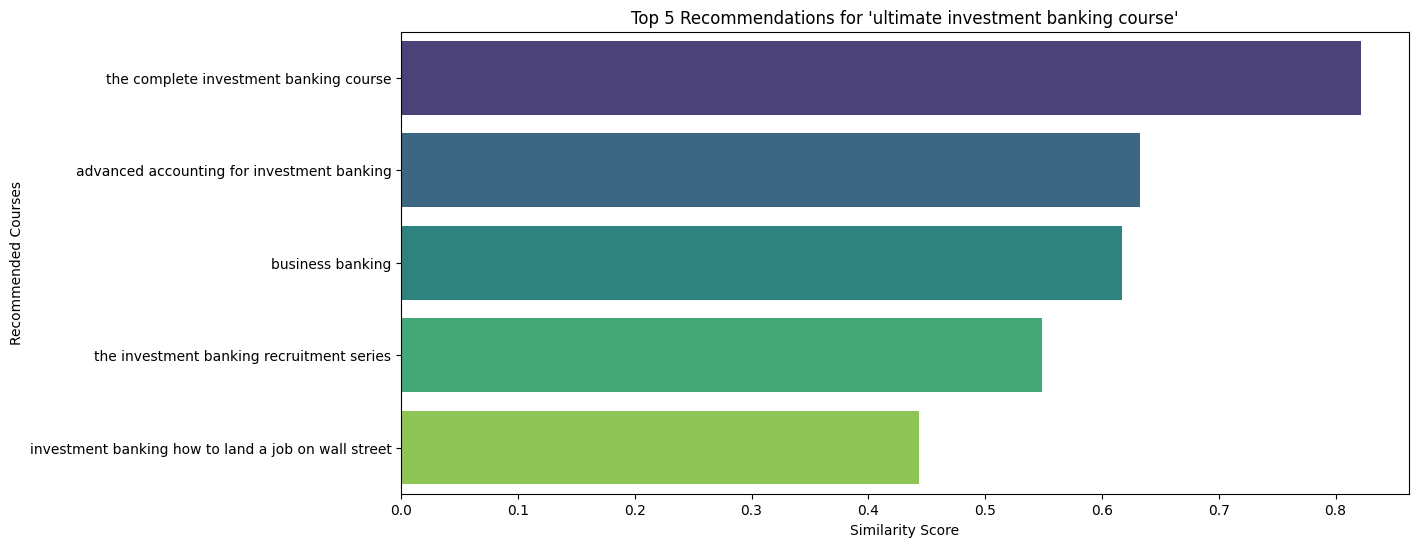

(['the complete investment banking course',
  'advanced accounting for investment banking',
  'business banking',
  'the investment banking recruitment series',
  'investment banking how to land a job on wall street'],
 [np.float64(0.8215171850015299),
  np.float64(0.6326117953658101),
  np.float64(0.6174416805053133),
  np.float64(0.5486428599542388),
  np.float64(0.44327238061738783)])

In [8]:
# Step 7 → Show recommendations with similarity scores + visualization

import matplotlib.pyplot as plt
import seaborn as sns

def get_recommendations_with_scores(title, cosine_sim=cosine_sim, top_n=5):
    # Step 1: Find the index of the course that matches the title
    idx = df.index[df['title'].str.lower() == title.lower()].tolist()
    if not idx:
        print("❌ Course not found in dataset.")
        return None
    idx = idx[0]

    # Step 2: Get similarity scores for all courses with this course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Step 3: Sort courses by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Step 4: Get top_n most similar courses (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Step 5: Extract course indices and scores
    course_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    # Step 6: Build results
    recommended_courses = df['title'].iloc[course_indices].tolist()

    # Print Results
    print(f"\n Recommended Courses for '{title}':\n")
    for course, score in zip(recommended_courses, scores):
        print(f"{course}  (score: {score:.4f})")

    # Visualization
    plt.figure(figsize=(13,6))
    sns.barplot(x=scores, y=recommended_courses, palette="viridis")
    plt.xlabel("Similarity Score")
    plt.ylabel("Recommended Courses")
    plt.title(f"Top {top_n} Recommendations for '{title}'")
    plt.show()

    return recommended_courses, scores


# Example Run
get_recommendations_with_scores("ultimate investment banking course")